In [1]:
# Modules for debugging

import nibabel
from PIL import Image
import os
import fnmatch
import numpy as np
import ants
import concurrent.futures
import pandas as pd
import glob
import xml.etree.ElementTree as ET
import xmltodict
import shutil
import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pyvista as pv
import tqdm
import gc

# Custom modules
from preprocessing_post_fastsurfer.alignment import *
from preprocessing_post_fastsurfer.cropping import *
from preprocessing_post_fastsurfer.extraction import *
from preprocessing_post_fastsurfer.file_handling import *
from preprocessing_post_fastsurfer.mesh_creation import *
from preprocessing_post_fastsurfer.subject import *
from preprocessing_post_fastsurfer.vis import *

np.set_printoptions(precision=2, suppress=True)

## Reference brain
Extract the brain from the MRI reference MRI for use in affine alginment

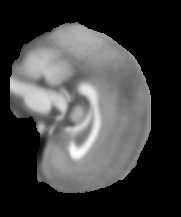

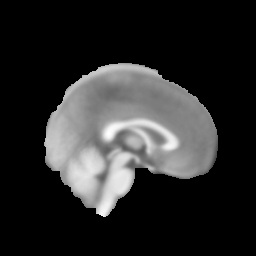

In [2]:
# NB seems that fastsrufer brain is better
reference_brain_array_mni = extract_brain("/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/mni_icbm152_lin_nifti/icbm_avg_152_t1_tal_lin.nii", "/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/mni_icbm152_lin_nifti/icbm_avg_152_t1_tal_lin_mask.nii")

display_array(reference_brain_array_mni)

reference_brain_array_fastsurfer = extract_brain("/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/mni_icbm152_lin_nifti/fastsurfer-processed/mri/orig_nu.mgz", "/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/mni_icbm152_lin_nifti/fastsurfer-processed/mri/mask.mgz")

display_array(reference_brain_array_fastsurfer)


## Main code

In [3]:
# Initialise a list of subject objects from the given directory
data_path = "/uolstore/home/student_lnxhome01/sc22olj/Compsci/year3/individual-project-COMP3931/individual-project-sc22olj/scratch-disk/full-datasets/hcampus-large-cohort"

subject_list = find_subjects_parallel(data_path)

print(len(subject_list))

# Chunk the subject list
def chunk_list(list, chunk_size):
    
    return [list[i:i + chunk_size] for i in range(0, len(list), chunk_size)]

chunks = chunk_list(subject_list, len(subject_list) // 20)


4569


In [4]:
for subject in subject_list:
    
    mesh = np.load(os.path.join(subject.path, 'Left-Hippocampus_Right-Hippocampus_cropped_mesh.npz'), allow_pickle=True)
    
    
    display_mesh(mesh['verts'], mesh['faces'], 1, mode='pyvista')
    
    break

CellSizeError: `faces` cell array size is invalid.

In [ ]:
'''# Extract left and right hippocampus from non-aligned brains (in the same file)
for chunk in chunks:
    
    print(len(chunk))
    
    extract_region_parallel(chunk, [17, 53], 'orig_nu', 'aparc', is_aligned=False)
    
    gc.collect()'''
    

In [ ]:
'''# Crop hippocampi
max_bbox = get_max_bbox(subject_list, 'Left-Hippocampus_Right-Hippocampus.nii')

for chunk in chunks:
    
    print(len(chunk))
    
    crop_subjects_parallel(subject_list, 'Left-Hippocampus_Right-Hippocampus.nii', max_bbox, is_full_brain=False, display=False, display_3d=False)'''

In [4]:
# Convert cropped hippocampi point clouds using walking cubes method
for chunk in chunks:
    
    print(len(chunk))

    volume_to_mesh_parallel(chunk, 'Left-Hippocampus_Right-Hippocampus_cropped.nii', downsample_factor=50, display=False)

228
228
228
228
228
228
228
228
228
228
228
228
228
228
228
228
228
228
228
228
9


In [4]:
# Delete all non-cropped hippocampi
for subject in subject_list:
    
    delete_file_matching(subject.path, 'Left-Hippocampus_Right-Hippocampus_cropped.nii')

In [ ]:
# Downsample all hippocampi meshes to have the same vector size for use in pytorch

min_samples = get_min_points(subject_list, 'Left-Hippocampus_Right-Hippocampus_cropped_mesh.npy')

for chunk in chunks:
    
    print(len(chunk))
    
    random_sample_cloud_parallel(chunk, 'Left-Hippocampus_Right-Hippocampus_cropped_mesh.npz', min_samples)

In [ ]:
'''for subject in subject_list:
    
    research_group = subject.subject_metadata['Group'].iloc[0]
    
    print(research_group)
    
    display_image(nibabel.load(subject.orig_nu))
    
    display_mesh(np.load(os.path.join(subject.path, 'Left-Hippocampus_Right-Hippocampus_cropped_mesh.npy')), downsample_factor=1)
    
    break'''